<a href="https://colab.research.google.com/github/earo12/Retail-Price-Optimization/blob/main/Retail_Price_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


Let's check the information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

Let's check if this dataframe has null values:

In [4]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

Since the column "product_id" doesn't have an important meaning during the development of the model, I won't use it anymore:

In [5]:
df.drop('product_id',axis = 1 ,inplace = True)

In [6]:
df.columns

Index(['product_category_name', 'month_year', 'qty', 'total_price',
       'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

Before of all, I'll check which are the highest price and the lowest price products of the dataframe

In [7]:
lowest = df.sort_values(by = 'total_price', ascending = False)
highest = df.sort_values(by = 'total_price', ascending = True)
print(f'Dataframe in descending order: {lowest}')
print('#------------------------------------#')
print(f'Dataframe in ascending order: {highest}')

Dataframe in descending order:      product_category_name  month_year  qty  total_price  freight_price  \
673         bed_bath_table  01-07-2017   59      12095.0      22.195932   
277          watches_gifts  01-05-2018  114      11820.2       0.095439   
674         bed_bath_table  01-08-2017   52      10375.0      19.412885   
175  computers_accessories  01-02-2018   69      10343.1      26.552899   
549          health_beauty  01-08-2018   28       9240.0      20.505357   
..                     ...         ...  ...          ...            ...   
468        furniture_decor  01-08-2018    1         35.0      19.440000   
336         consoles_games  01-02-2018    1         32.5      11.850000   
623          health_beauty  01-10-2017    1         29.9      11.850000   
281             cool_stuff  01-09-2017    1         29.5      11.730000   
329         consoles_games  01-07-2017    1         19.9      11.850000   

     unit_price  product_name_lenght  product_description_lenght  \


Let's check our distributions by making histograms:

In [13]:
# PLOTLY:
fig = px.histogram(df, x = 'total_price', title = 'Distribution of Total Price')
fig.show()

Text(0.5, 1.0, 'Distribution of total price')

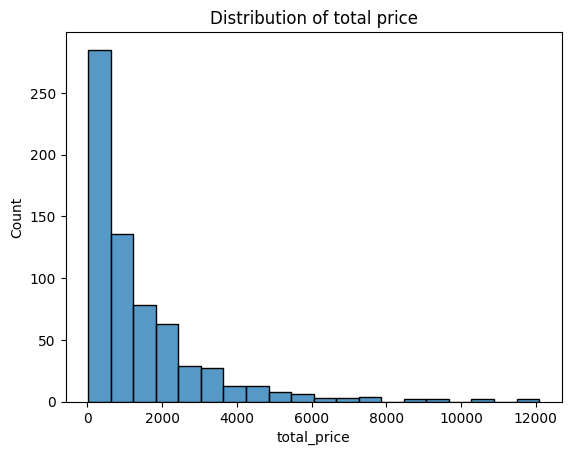

In [15]:
# SEABORN:
sns.histplot(df, x='total_price', bins = 20)
plt.title('Distribution of total price')
plt.show()

In [17]:
# PLOTLY
fig = px.box(df, y = 'unit_price', title = 'Distribution of unit price')
fig.show()

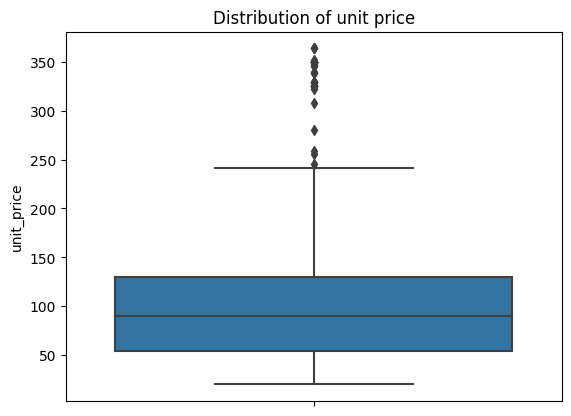

In [18]:
# SEABORN:
sns.boxplot(df, y = 'unit_price')
plt.title('Distribution of unit price')
plt.show()

In [19]:
# PLOTLY
fig = px.scatter(df, x = 'qty', y = 'total_price', trendline = 'ols', title = 'Quantity vs Total Price')
fig.show()